In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_train = pd.read_csv('bureau_train.csv')
bureau_test = pd.read_csv('bureau_test.csv')

In [21]:
bureau_balance.shape, bureau_train.shape, bureau_test.shape

((27299925, 3), (170161, 30), (61503, 30))

In [22]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [23]:
bureau_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,DAYS_CREDIT_UPDATE
0,243191,0,F,171000.0,555273.0,16366.5,463500.0,Pensioner,Secondary / secondary special,0.035792,...,5097187.0,Active,-1431.875000,0.0,-434.750000,-1171.750000,186008.2875,64721.812500,0.0,-664.750000
1,111778,0,M,157500.0,198085.5,23638.5,171000.0,Working,Secondary / secondary special,0.010032,...,6091779.0,Closed,-1399.769231,0.0,2331.333333,-1244.222222,99162.6300,18770.318182,0.0,-549.076923
2,175057,1,M,135000.0,776304.0,25173.0,648000.0,Working,Lower secondary,0.035792,...,5594919.0,Closed,-1334.750000,0.0,-999.500000,-1020.000000,31545.0450,0.000000,0.0,-807.750000
3,372147,0,M,164133.0,900000.0,36787.5,900000.0,Commercial associate,Secondary / secondary special,0.030755,...,5154090.0,Closed,-811.875000,0.0,-121.750000,-811.600000,282913.7850,234500.785714,0.0,-515.500000
4,373412,0,M,225000.0,533668.5,21294.0,477000.0,Commercial associate,Secondary / secondary special,0.025164,...,5238077.0,Active,-905.375000,0.0,5647.625000,-1098.750000,707976.1125,408448.125000,0.0,-577.875000


In [24]:
bureau_test.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,DAYS_CREDIT_UPDATE
0,384575,0,M,207000.0,465457.5,52641.0,418500.0,Commercial associate,Secondary / secondary special,0.009630,...,6416389.0,Closed,-1142.857143,0.0,-891.000000,-716.750000,138610.928571,39569.785714,5400.0,-483.857143
1,214010,0,F,247500.0,1281712.5,48946.5,1179000.0,Commercial associate,Higher education,0.006852,...,5977750.0,Closed,-841.600000,0.0,2372.800000,-412.000000,866173.500000,0.000000,0.0,-265.400000
2,142232,0,F,202500.0,495000.0,39109.5,495000.0,Working,Secondary / secondary special,0.035792,...,5353341.0,Active,-859.166667,0.0,-55.833333,-971.333333,467347.500000,238527.750000,0.0,-408.166667
3,389171,0,F,247500.0,254700.0,24939.0,225000.0,State servant,Secondary / secondary special,0.046220,...,5347375.0,Closed,-2421.000000,0.0,-2163.000000,-1777.500000,126258.525000,0.000000,0.0,-1776.000000
4,283617,0,M,112500.0,308133.0,15862.5,234000.0,Working,Secondary / secondary special,0.018850,...,6293239.0,Closed,-1215.666667,0.0,-301.000000,-1561.500000,453525.000000,162492.000000,0.0,-1044.000000


# Dados Duplicados

In [25]:
bureau_balance.duplicated().sum()

0

In [26]:
bureau_balance.SK_ID_BUREAU.duplicated().sum()

26482530

In [27]:
bureau_balance.SK_ID_BUREAU.value_counts()

SK_ID_BUREAU
5645521    97
6733619    97
6176606    97
6321834    97
6356432    97
           ..
6212548     1
5819605     1
5626301     1
5626300     1
6803532     1
Name: count, Length: 817395, dtype: int64

In [28]:
# As variaveis que possuem variações em suas descrições mostram informações adicionais para cda cliente
bureau_balance[bureau_balance['SK_ID_BUREAU'] == 5645521]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
17944160,5645521,0,C
17944161,5645521,-1,C
17944162,5645521,-2,C
17944163,5645521,-3,C
17944164,5645521,-4,C
...,...,...,...
17944252,5645521,-92,C
17944253,5645521,-93,C
17944254,5645521,-94,C
17944255,5645521,-95,C


In [29]:
# As variaveis que possuem variações em suas descrições mostram informações adicionais para cda cliente
bureau_balance[bureau_balance['SK_ID_BUREAU'] == 6733619]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
23029166,6733619,0,C
23029167,6733619,-1,C
23029168,6733619,-2,C
23029169,6733619,-3,C
23029170,6733619,-4,C
...,...,...,...
23029258,6733619,-92,C
23029259,6733619,-93,C
23029260,6733619,-94,C
23029261,6733619,-95,C


In [30]:
# Vou agrupar os valores da média de cada cliente para cada variavel
# Assim terá uma representação do histórico de cada cliente
# Função para calcular a moda
def mode_func(x):
    return x.mode().iloc[0] if not x.empty else None

# Definindo o dicionário com as funções de agregação por coluna
agg_dict = {  
    'MONTHS_BALANCE': 'min',
    'STATUS': mode_func,
}

# Aplicando a agregação por grupo (SK_ID_CURR)
bureau_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(agg_dict).reset_index()

In [31]:
bureau_agg.shape

(817395, 3)

In [32]:
bureau_agg.value_counts()

SK_ID_BUREAU  MONTHS_BALANCE  STATUS
5001709       -96             C         1
6287214       -12             0         1
6287216       -30             C         1
6287217       -59             C         1
6287218       -96             C         1
                                       ..
5843799       -6              0         1
5843800       -12             0         1
5843801       -9              0         1
5843802       -9              0         1
6842888       -61             C         1
Name: count, Length: 817395, dtype: int64

# Merge / Treino-Teste

## Amostra / Treino - Teste

In [9]:
# Criar uma amostra de 0,05% do DataFrame
amostra = bureau_balance.sample(frac=0.05, random_state=42)

amostra.shape

(1364996, 3)

In [37]:
# Separando o conjunto de dados bureau_balance entre treino e teste
bureau_balance_train, bureau_balance_test = train_test_split(bureau_agg, test_size=0.08, random_state=42)

# Exibindo o tamanho dos conjuntos de treino e teste
# Vou deixar a mesma quantidade de teste do bureau_test
print(f"Tamanho do conjunto de treino (bureau_balance_train): {bureau_balance_train.shape}")
print(f"Tamanho do conjunto de teste (bureau_balance_test): {bureau_balance_test.shape}")

Tamanho do conjunto de treino (bureau_balance_train): (752003, 3)
Tamanho do conjunto de teste (bureau_balance_test): (65392, 3)


## Merge

In [38]:
df_bureau_train = pd.merge(bureau_train, bureau_balance_train, on='SK_ID_BUREAU', how='left')
df_bureau_test = pd.merge(bureau_test, bureau_balance_test, on='SK_ID_BUREAU', how='left')

df_bureau_train.shape, df_bureau_test.shape

((170161, 32), (61503, 32))

# Tratamento de Dados

In [39]:
df_bureau_train.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
CODE_GENDER                         0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_EMP_PHONE                      0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                   0
FLAG_DOCUMENT_3                     0
EXT_SOURCE_MEAN                     0
SK_ID_BUREAU                        0
CREDIT_ACTIVE                       0
DAYS_CREDIT                         0
CREDIT_DAY_OVERDUE                  0
DAYS_CREDIT_ENDDATE                 0
DAYS_ENDDATE_FACT                   0
AMT_CREDIT_S

In [45]:
# Calcular a porcentagem de valores nulos em cada coluna
null_percent = (df_bureau_train.isnull().sum() / len(df_bureau_train)) * 100

null_percent
# Pelo visto a maioria dos clientes do application_train não possuem registros no bureau_balance

SK_ID_CURR                     0.0
TARGET                         0.0
CODE_GENDER                    0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_EMP_PHONE                 0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_CITY_NOT_WORK_CITY         0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_3                0.0
EXT_SOURCE_MEAN                0.0
SK_ID_BUREAU                   0.0
CREDIT_ACTIVE                  0.0
DAYS_CREDIT                    0.0
CREDIT_DAY_OVERDUE             0.0
DAYS_CREDIT_ENDDATE            0.0
DAYS_ENDDATE_FACT              0.0
AMT_CREDIT_SUM                 0.0
AMT_CREDIT_SUM_DEBT            0.0
AMT_CREDIT_SUM_LIMIT

In [44]:
# Removendo os valores nulos da coluna MONTHS_BALANCE para fazer algumas analises
df_bureau_train = df_bureau_train.dropna(subset=['STATUS'])

df_bureau_train.shape

(54442, 32)

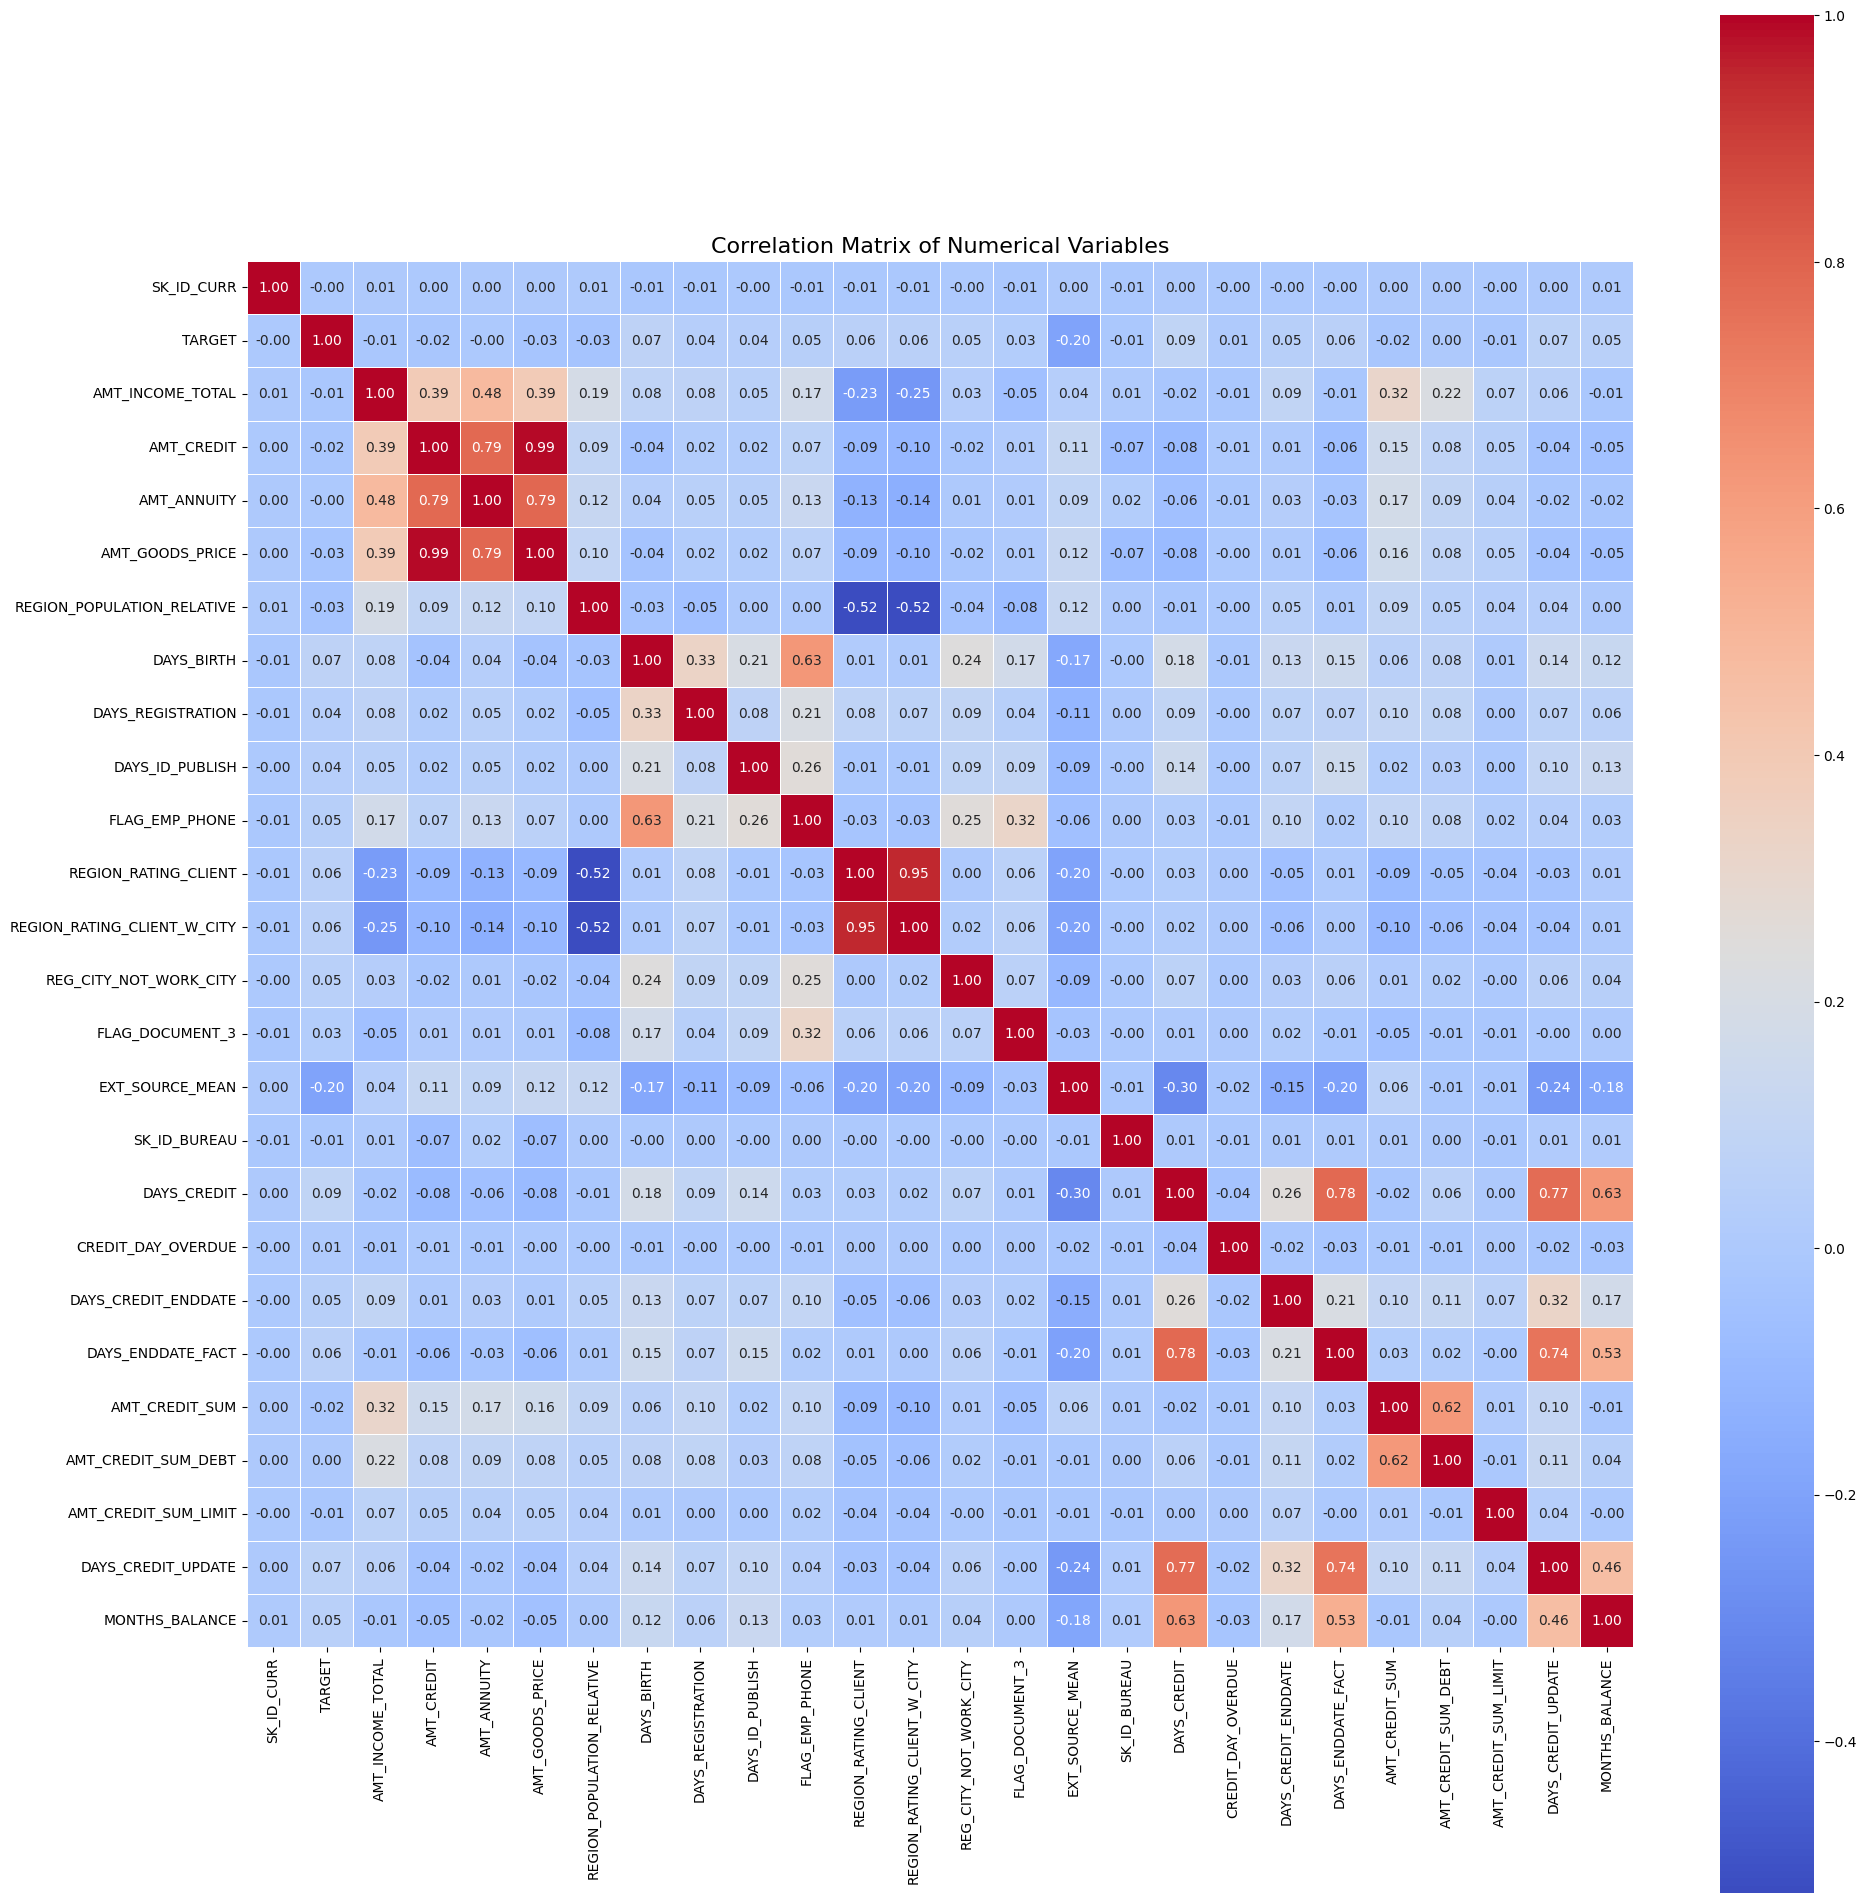

In [46]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_bureau_train.select_dtypes(include=['int64', 'float64']).columns

# Calcular a matriz de correlação
correlation_matrix = df_bureau_train[numeric_cols].corr()

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.yticks()
plt.xticks()
plt.tight_layout()
plt.show()

Conclusão

- Variaveis adicionadas não possuem uma correlação forte com a TARGET.
- MONTHS_BALANCE e DAYS_CREDIT possuem uma multicolineariedade entre si.
- DAYS_CREDIT e DAYS_CREDIT_ENDDATE uma correlação entre si também.
- AMT_CREDIT e AMT_ANNUITY_x possuem correlações entre si forte.
- REGION_RATING_CLIENT e REGION_RATING_CLIENT_W_CITY possuem uma correlação muito forte entre si, também.

In [49]:
inadimplentes = df_bureau_train[df_bureau_train['TARGET'] == 1]
nao_inadimplentes = df_bureau_train[df_bureau_train['TARGET'] == 0]


def calcular_iv(inadimplentes, nao_inadimplentes, variavel):
    # Calculando a taxa de inadimplência e não inadimplência
    bad_rate = inadimplentes.groupby(variavel).size() / len(inadimplentes)
    good_rate = nao_inadimplentes.groupby(variavel).size() / len(nao_inadimplentes)
    
    # Calculando o WOE (Weight of Evidence)
    woe = np.log(good_rate / bad_rate)
    
    # Calculando o IV (Information Value)
    iv = np.sum((good_rate - bad_rate) * woe)
    
    return iv

# Dicionário para armazenar os IVs
iv_variaveis = {}

# Iteração sobre as colunas dos dataframes (supondo que são os mesmos para inadimplentes e não inadimplentes)
for coluna in inadimplentes.columns:
    if coluna != 'TARGET':
        iv = calcular_iv(inadimplentes, nao_inadimplentes, coluna)
        iv_variaveis[coluna] = iv

# Ordenando as variáveis por IV decrescente
iv_variaveis_ordenado = sorted(iv_variaveis.items(), key=lambda x: x[1], reverse=True)

print(f'Variaveis menos importantes com base no IV:')

# Filtrando e exibindo apenas variáveis com IV < 0.02
for variavel, valor_iv in iv_variaveis_ordenado:
    if valor_iv < 0.02:
        print(f'{variavel}: {valor_iv}')


Variaveis menos importantes com base no IV:
STATUS: 0.015252764927275777
FLAG_DOCUMENT_3: 0.010550836945965255
EXT_SOURCE_MEAN: 0.00805757252568639
SK_ID_CURR: 0.0
SK_ID_BUREAU: 0.0


- A variavel STATUS não acrescenta informações ao conjunto, a MONTHS_BALANCE possivelmente tem uma relação maior com o conjunto, no entanto, isso foi realizado com a exclusão dos valores nulos que estavam acima de 60%, portanto vou procurar outras formas de acrescentar informações aos clientes e deixar esse dataset excluido das futuras analises.